In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import itertools
from matplotlib.mlab import griddata as mlab_griddata
from scipy.interpolate import griddata as scipy_griddata 

In [3]:
load_mpl_style('single_plot.mplstyle')
ignore_warnings()

Function that we use for demonstration

In [4]:
def saddle(x,y):
    return x**2 - y**2

## Original points

Original $x,y$ values:

In [5]:
x = np.linspace(-10.0, 10.0, 10)
y = np.linspace(-10.0, 10.0, 10)

In [6]:
X,Y = np.meshgrid(x,y)

In [7]:
X_flat = X.flatten()
Y_flat = Y.flatten()

In [8]:
X_flat.shape

(100,)

Calculating $z$ values:

In [9]:
Z = saddle(X,Y)
Z_flat = Z.flatten()

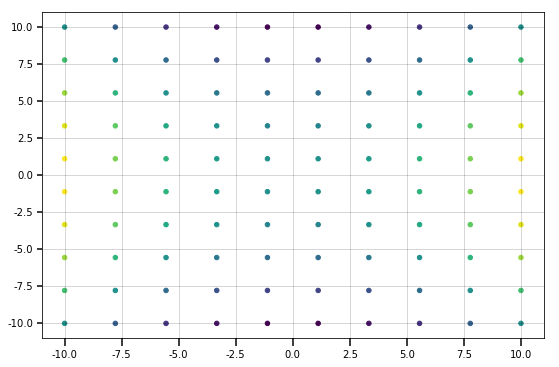

In [10]:
f,a = plt.subplots()
a.scatter(X_flat, Y_flat, c=Z_flat, s=20)

## Interpolation

Interpolation specification:

In [11]:
x_num, xmin, xmax = 100, X.min(), X.max()
y_num, ymin, ymax = 100, Y.min(), Y.max()

### `matplotlib.mlab.griddata`

Original points

In [12]:
X,Y = np.meshgrid(x,y)
X_flat = X.flatten()
Y_flat = Y.flatten()

In [13]:
X_flat.shape

(100,)

Interpolation at points:

In [14]:
xi = np.linspace( xmin,  xmax, x_num, endpoint=True )
yi = np.linspace( ymin,  ymax, y_num, endpoint=True )

In [15]:
zi_mlab_linear = mlab_griddata(X_flat, Y_flat, Z_flat, xi, yi, interp='linear')

In [16]:
zi_mlab_linear.shape

(100, 100)

### `scipy.interpolate.griddata`

Original points:

In [17]:
xy_points = np.array(list(itertools.product(*[x,y])))

In [18]:
z_values = saddle(xy_points[:,0], xy_points[:,1])

In [19]:
xy_points.shape

(100, 2)

In [20]:
z_values.shape

(100,)

Interpolating at points:

In [21]:
xi = np.linspace( xmin,  xmax, x_num, endpoint=True )
yi = np.linspace( ymin,  ymax, y_num, endpoint=True )
Xi,Yi = np.meshgrid(xi,yi)

In [22]:
Xi.shape

(100, 100)

Interpolation:

In [23]:
zi_scipy_nearest = scipy_griddata(xy_points, z_values, (Xi, Yi), method='nearest')
zi_scipy_linear  = scipy_griddata(xy_points, z_values, (Xi, Yi), method='linear')
zi_scipy_cubic   = scipy_griddata(xy_points, z_values, (Xi, Yi), method='cubic')

In [24]:
zi_scipy_linear.shape

(100, 100)

Contours

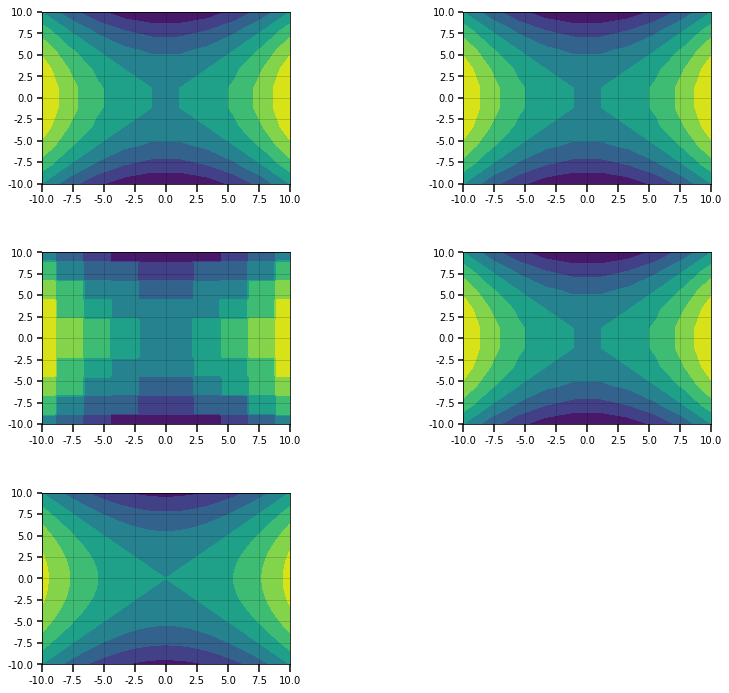

In [25]:
f,axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
a = axes.flatten()
a[0].contourf(x, y, Z)
a[1].contourf(xi, yi, zi_mlab_linear)
a[2].contourf(xi, yi, zi_scipy_nearest)
a[3].contourf(xi, yi, zi_scipy_linear)
a[4].contourf(xi, yi, zi_scipy_cubic)
f.delaxes(a[5])